# PROCESAMIENTO DE IMÁGENES

---
---

## IMÁGENES

---

In [1]:
#%matplotlib notebook
from Images import get_images, print_img, print_n_imgs, print_zoomed_imgs, print_histogram, img_similarity, print_hist_combs

### LEER IMAGES

In [2]:
_path = "./images/*.jpg"
_IMGS = get_images(_path)

### ELEGIR LA IMAGEN

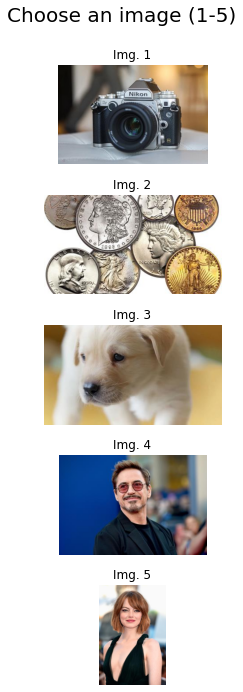

In [3]:
imgs_len = len(_IMGS)

print_n_imgs(imgs=_IMGS,
             titles=[f"Img. {i}" for i in range(1, imgs_len + 1)],
             title=f"Choose an image (1-{imgs_len})",
             columnMode=True)

In [4]:
def get_input():
    try:
        n = int(input(f"Image number (1-{imgs_len}). (Default: 1): "))
    except ValueError:
        n = 1
    return n
#n = get_input()
n = 3
_IMG = _IMGS[n - 1]

## CREAR RUIDO EN LAS IMÁGENES

---

In [5]:
from Noise import Noiser
nsr = Noiser()

In [6]:
# Color.
img = _IMG

# Grayscale.
gray_img = nsr.rgb2gray(img)

# Salt and Pepper.
sp_gray_img = nsr.create_sp_noise(gray_img)

# Gaussian.
gaussian_gray_img = nsr.create_gaussian_noise(gray_img)

# Speckle.
speckle_gray_img = nsr.create_speckle_noise(gray_img)

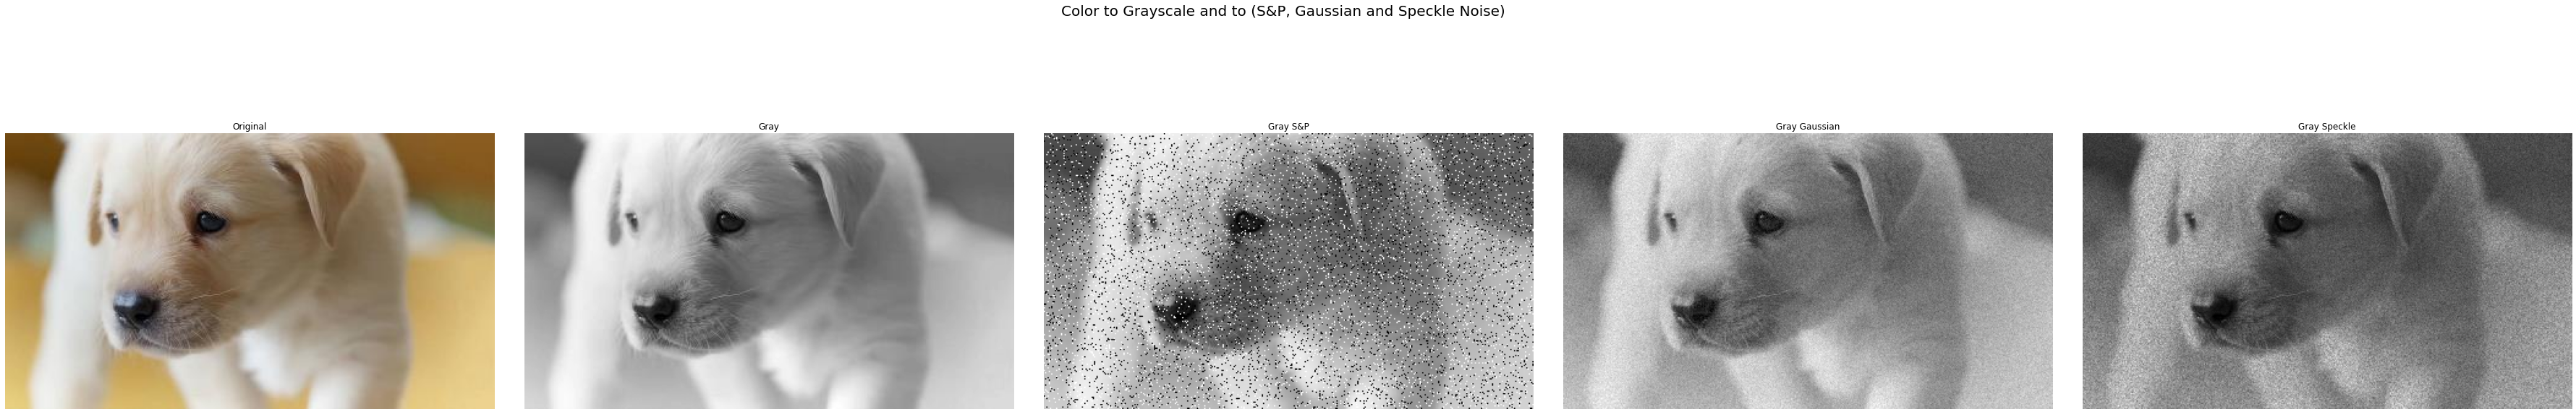

In [7]:
print_n_imgs(title="Color to Grayscale and to (S&P, Gaussian and Speckle Noise)", 
             imgs=[img, gray_img, sp_gray_img, gaussian_gray_img, speckle_gray_img],
             titles=["Original", "Gray", "Gray S&P", "Gray Gaussian", "Gray Speckle"])

## FILTROS DE RUIDO

---

In [8]:
from Noise import Denoiser
dns = Denoiser()

### FLAG PARA FILTROS DE ELIMINACIÓN DE RUIDO MAS COMPLEJOS Y COSTOSOS

In [9]:
_COMPLEX_FILTERS = False

### FILTRO DE MEDIANA

In [10]:
# S&P Noise.
sp_median_filtered = dns.median_diffusion(sp_gray_img, th=0.01)

# Gaussian Noise.
gaussian_median_filtered = dns.median_diffusion(gaussian_gray_img)

# Speckle Noise.
speckle_median_filtered = dns.median_diffusion(speckle_gray_img)

### FILTRO DE MEDIA

In [11]:
# S&P Noise.
sp_mean_filtered = dns.mean_diffusion(sp_gray_img, th=0.01)

# Gaussian Noise.
gaussian_mean_filtered = dns.mean_diffusion(gaussian_gray_img)

# Speckle Noise.
speckle_mean_filtered = dns.mean_diffusion(speckle_gray_img)

### FILTRO GAUSSIANO

In [12]:
if _COMPLEX_FILTERS:
    
    # S&P Noise.
    sp_gaussian_filtered = dns.gaus_diffusion(sp_gray_img, th=0.01)

    # Gaussian Noise.
    gaussian_gaussian_filtered = dns.gaus_diffusion(gaussian_gray_img)

    # Speckle Noise.
    speckle_gaussian_filtered = dns.gaus_diffusion(speckle_gray_img)

### FILTRO ANISOTRÓPICO

In [13]:
if _COMPLEX_FILTERS:
    
    # S&P Noise.
    sp_anisotropic_filtered = dns.anis_diffusion(sp_gray_img, th=0.01)

    # Gaussian Noise.
    gaussian_anisotropic_filtered = dns.anis_diffusion(gaussian_gray_img)

    # Speckle Noise.
    speckle_anisotropic_filtered = dns.anis_diffusion(speckle_gray_img)

## SALIDA

---

### RUIDO S&P (SALT & PEPPER)

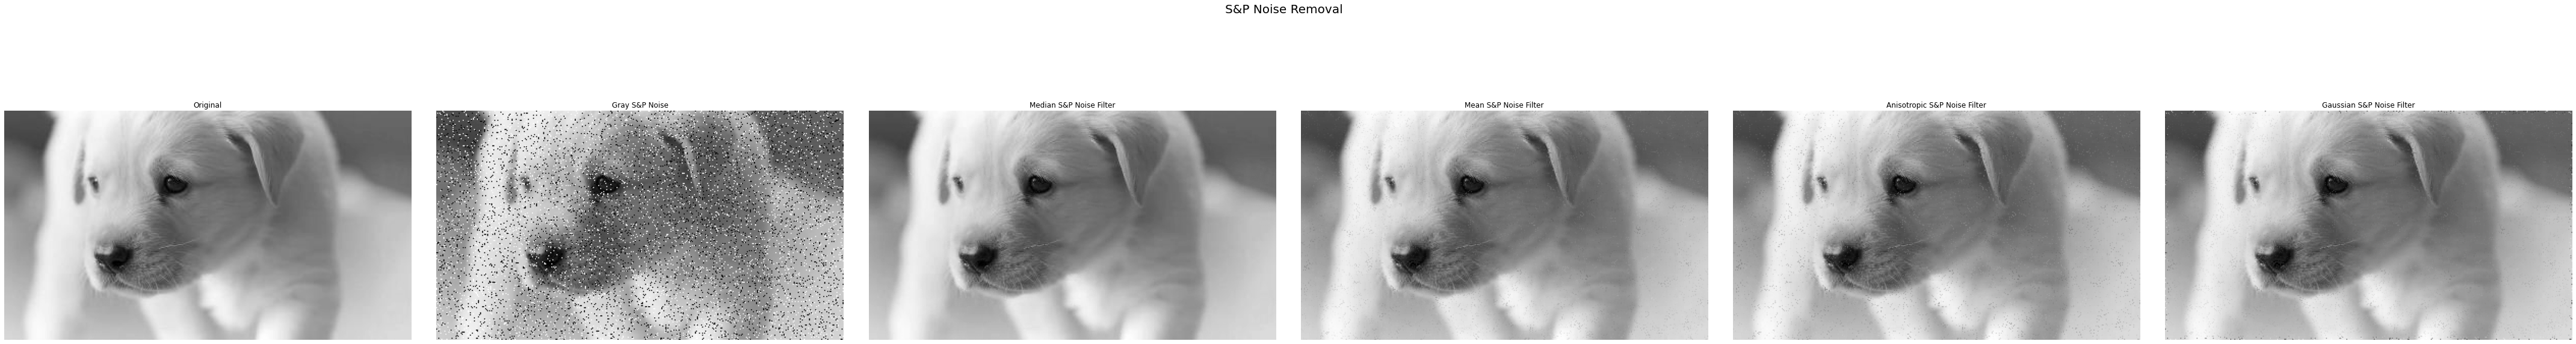

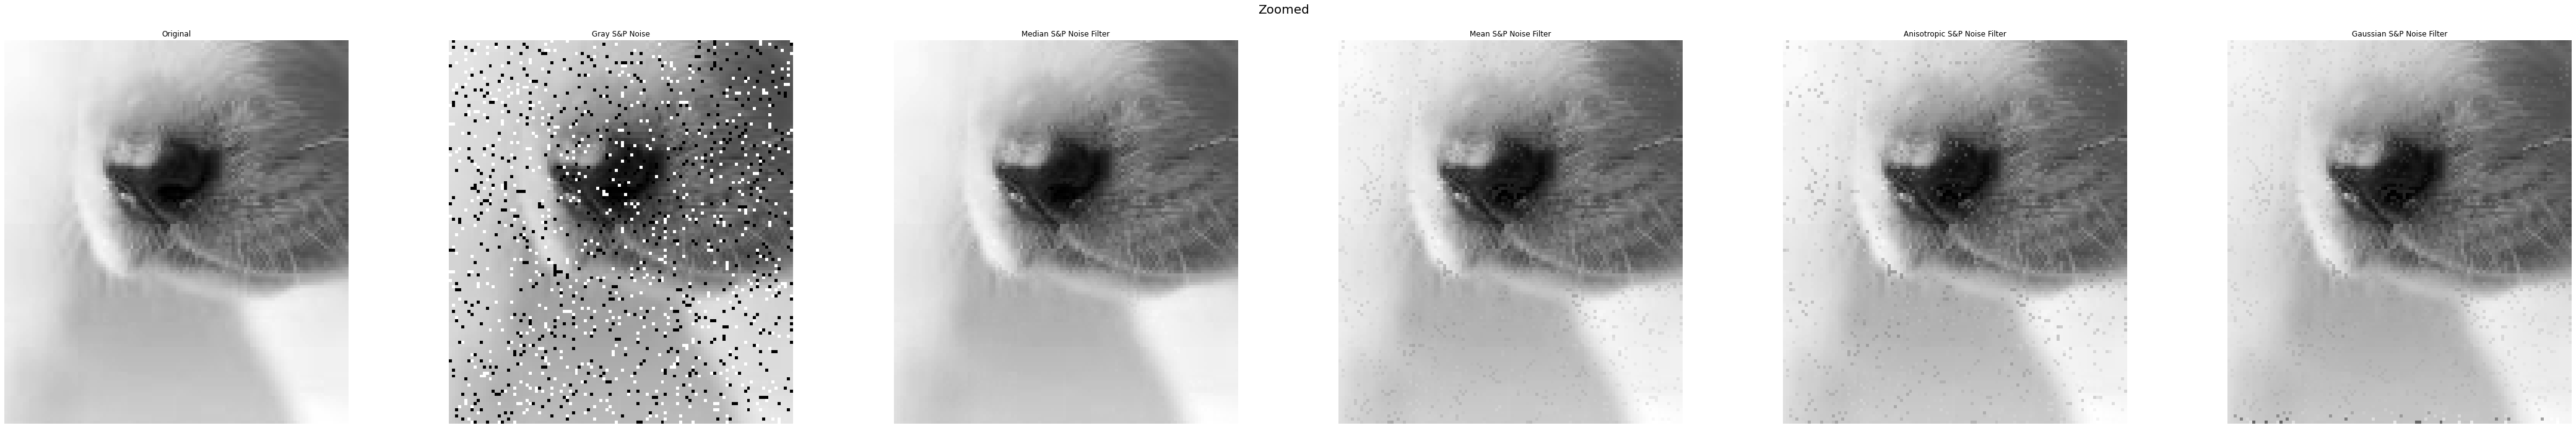

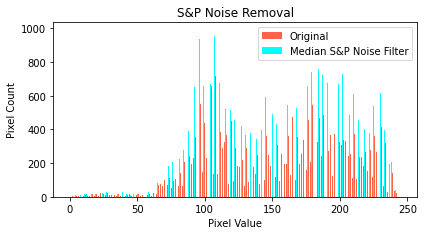

Image similarity: 98.29%


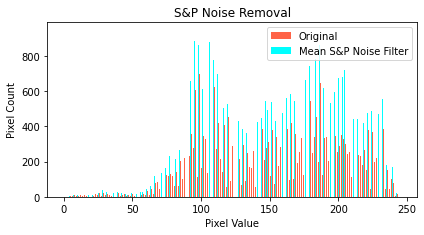

Image similarity: 92.15%


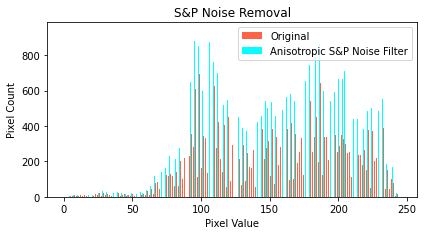

Image similarity: 92.04%


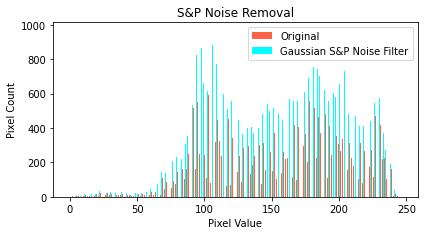

Image similarity: 92.28%


In [14]:
title = "S&P Noise Removal"

imgs = [gray_img, sp_gray_img, sp_median_filtered, sp_mean_filtered]
titles = ["Original", "Gray S&P Noise", "Median S&P Noise Filter", "Mean S&P Noise Filter"]

if _COMPLEX_FILTERS:
  imgs.extend([sp_anisotropic_filtered, sp_gaussian_filtered])
  titles.extend(["Anisotropic S&P Noise Filter",  "Gaussian S&P Noise Filter"])

print_n_imgs(title=title, imgs=imgs, titles=titles)
print_zoomed_imgs(title="Zoomed", imgs=imgs, titles=titles)

print_hist_combs(imgs=imgs, titles=titles, title=title)

### RUIDO GAUSSIANO

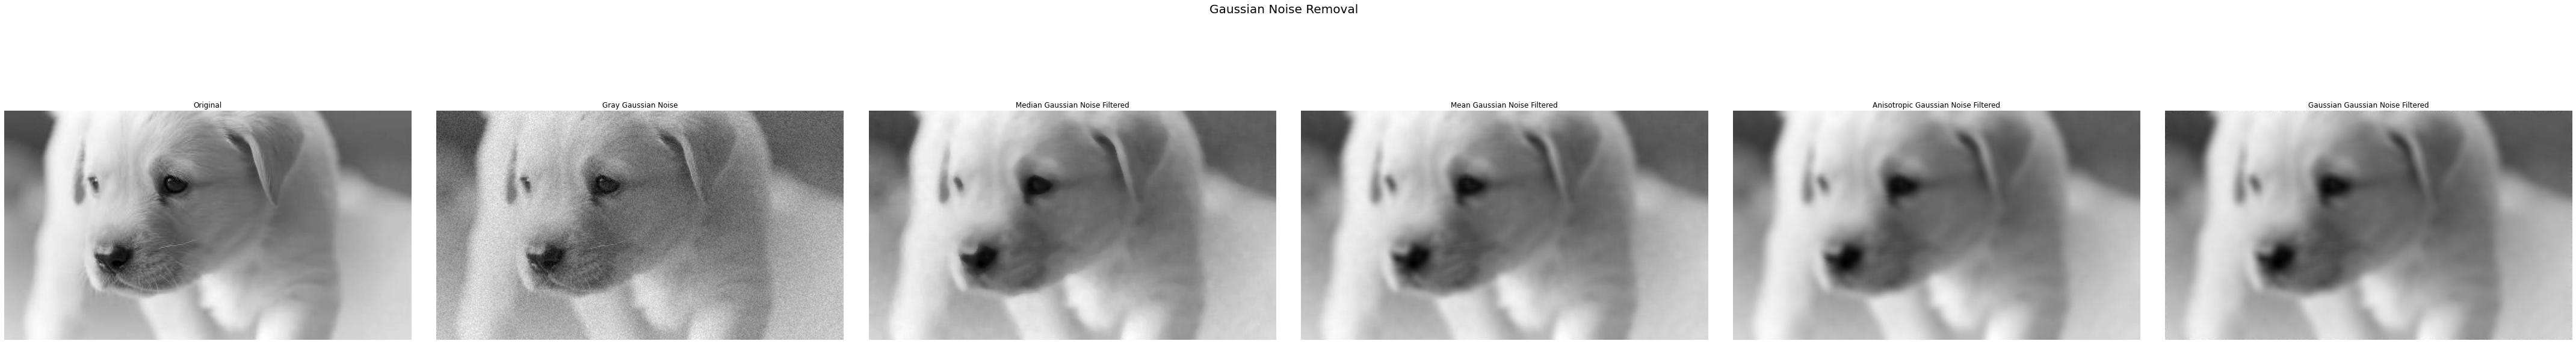

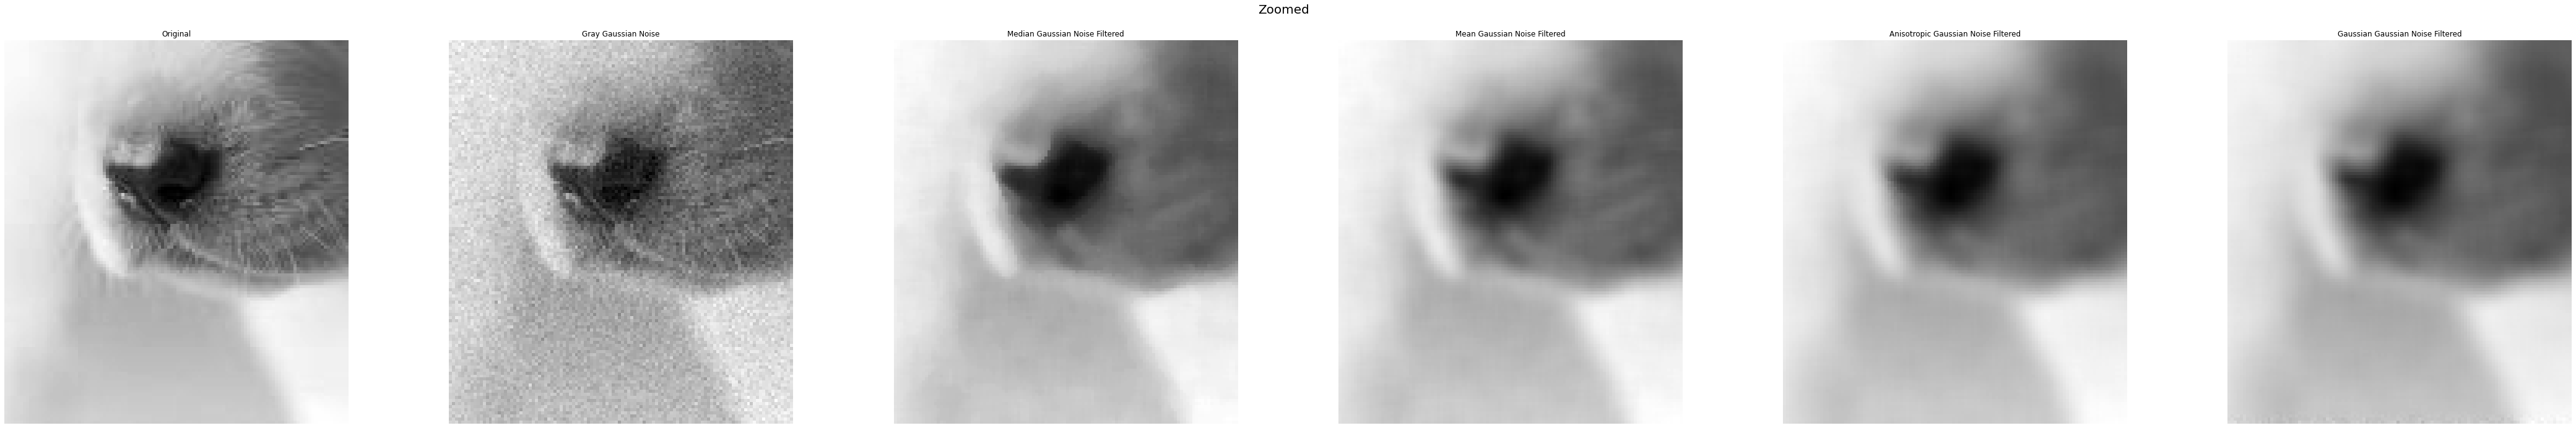

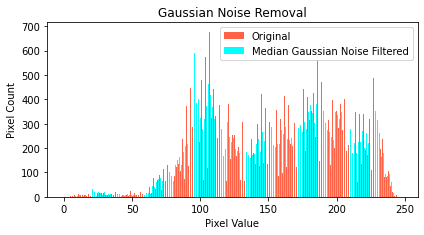

Image similarity: 71.79%


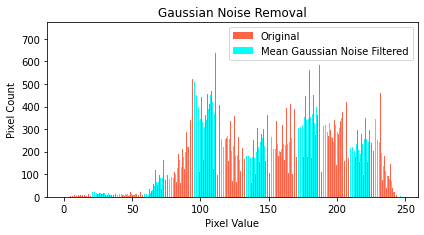

Image similarity: 74.57%


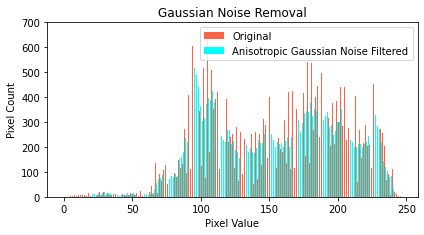

Image similarity: 72.64%


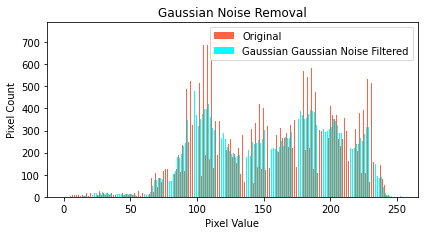

Image similarity: 71.80%


In [15]:
title = "Gaussian Noise Removal"

imgs = [gray_img, gaussian_gray_img, gaussian_median_filtered, gaussian_mean_filtered]
titles = ["Original", "Gray Gaussian Noise", "Median Gaussian Noise Filtered", "Mean Gaussian Noise Filtered"]

if _COMPLEX_FILTERS:
  imgs.extend([gaussian_anisotropic_filtered, gaussian_gaussian_filtered])
  titles.extend(["Anisotropic Gaussian Noise Filtered",  "Gaussian Gaussian Noise Filtered"])

print_n_imgs(title=title, imgs=imgs, titles=titles)
print_zoomed_imgs(title="Zoomed", imgs=imgs, titles=titles)

print_hist_combs(imgs=imgs, titles=titles, title=title)

### RUIDO DE MANCHA

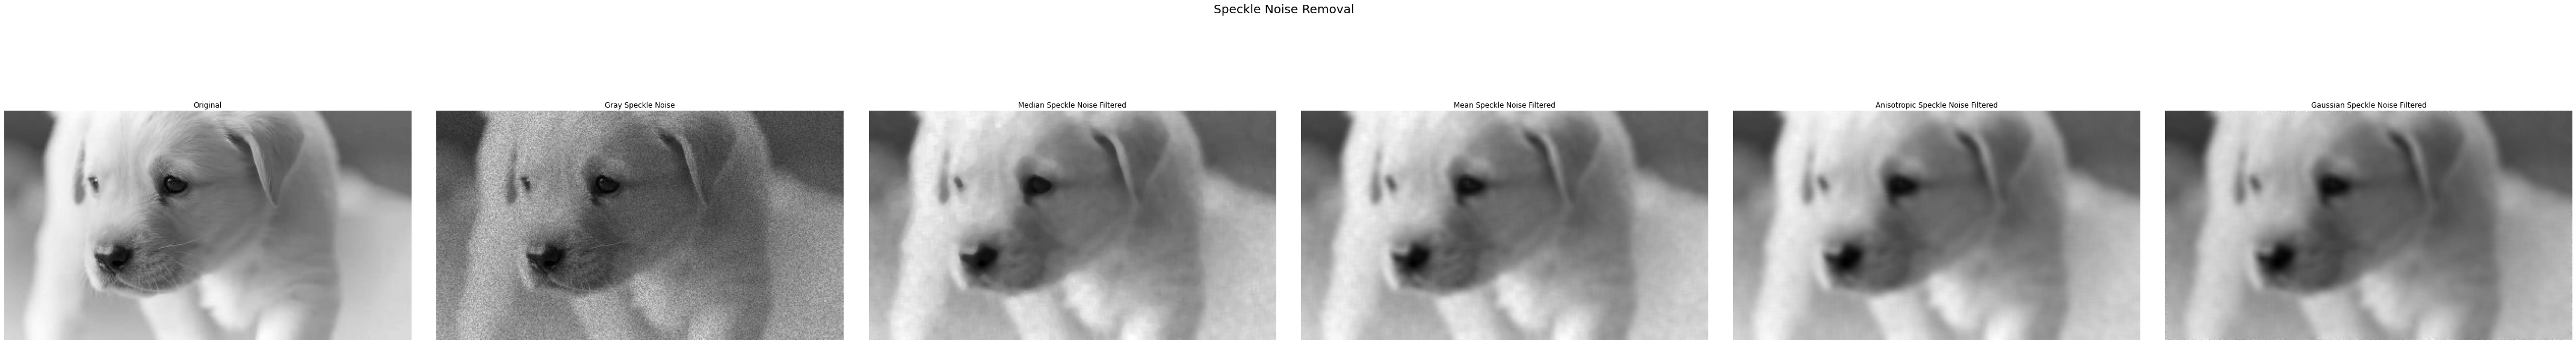

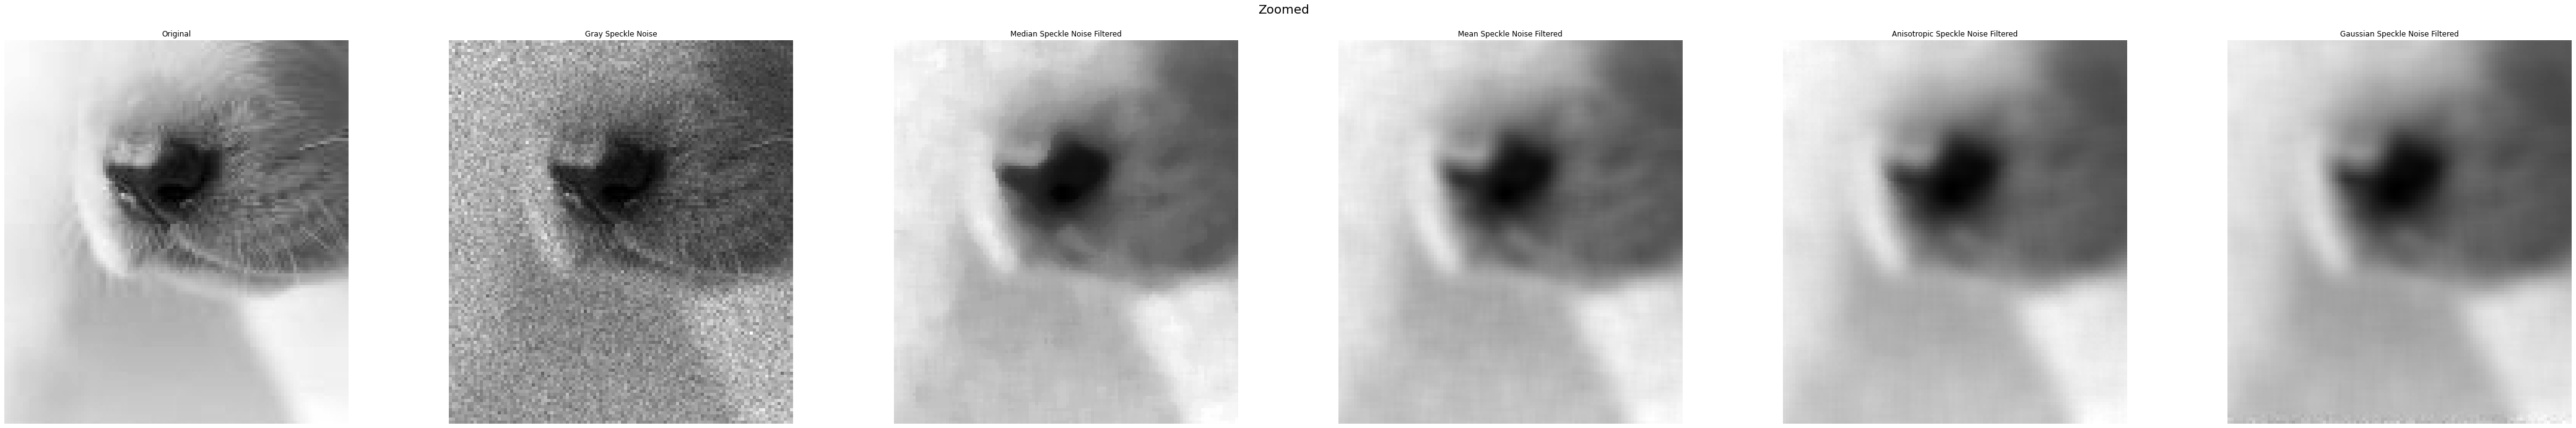

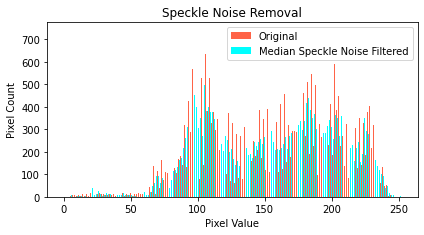

Image similarity: 59.04%


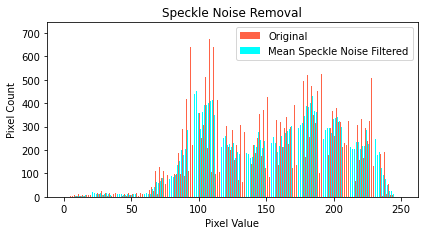

Image similarity: 64.71%


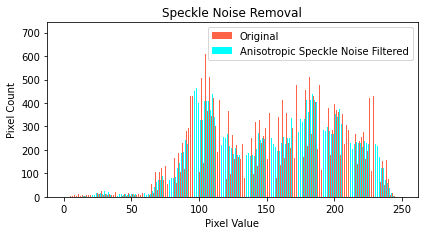

Image similarity: 66.21%


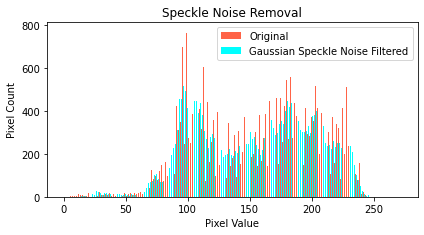

Image similarity: 65.04%


In [16]:
title = "Speckle Noise Removal"

imgs = [gray_img, speckle_gray_img, speckle_median_filtered, speckle_mean_filtered]
titles = ["Original", "Gray Speckle Noise", "Median Speckle Noise Filtered", "Mean Speckle Noise Filtered"]

if _COMPLEX_FILTERS:
  imgs.extend([speckle_anisotropic_filtered, speckle_gaussian_filtered])
  titles.extend(["Anisotropic Speckle Noise Filtered",  "Gaussian Speckle Noise Filtered"])


print_n_imgs(title=title, imgs=imgs, titles=titles)
print_zoomed_imgs(title="Zoomed", imgs=imgs, titles=titles)

print_hist_combs(imgs=imgs, titles=titles, title=title)

## DETECCIÓN DE BORDES

---

In [17]:
from Edge import EdgeDetection
edgeDet = EdgeDetection()

### EJEMPLO

In [18]:
denoised_img =  gaussian_gaussian_filtered if _COMPLEX_FILTERS else gaussian_median_filtered

In [19]:
edge_image = edgeDet.detect_edges(denoised_img)

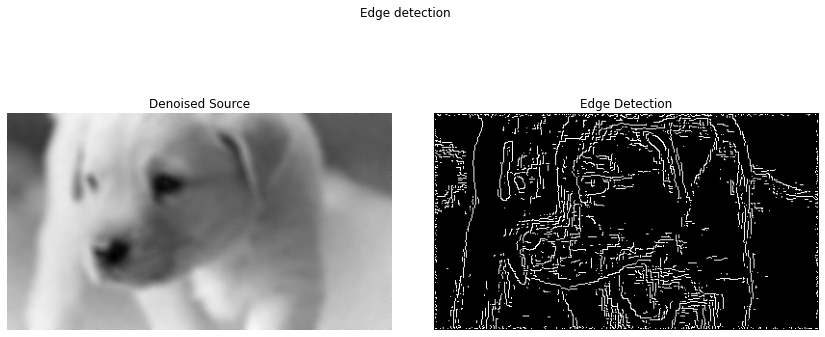

In [20]:
title = "Edge detection"
imgs = [denoised_img, edge_image]
titles = ["Denoised Source", "Edge Detection"]

print_n_imgs(imgs=imgs,
             titles=titles,
             title=title,
             width=6)

### PASO A PASO

#### DETECCIÓN DE BORDES CON SOBEL KERNEL Y DETECCIÓN DE DIRECCIÓN

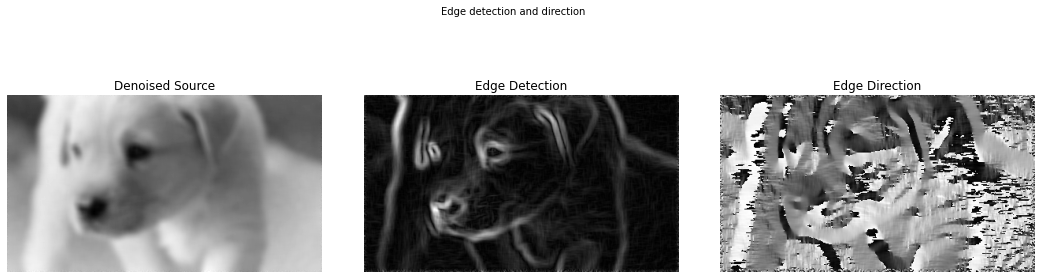

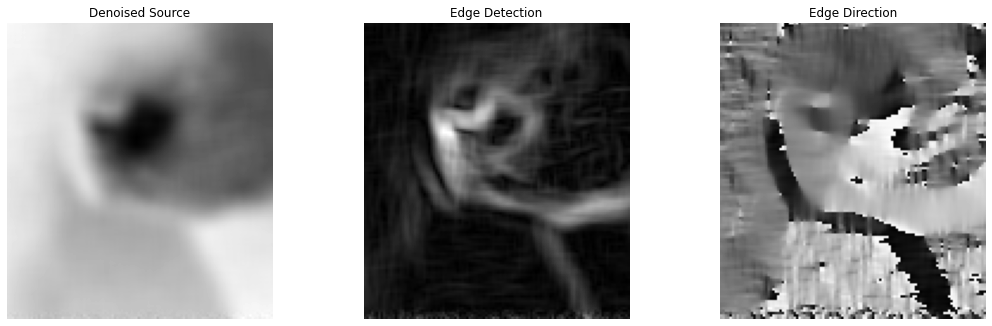

In [21]:
bordered_img, edge_dir = edgeDet.sobel_filters(denoised_img)

title = "Edge detection and direction"
imgs = [denoised_img, bordered_img, edge_dir]
titles = ["Denoised Source", "Edge Detection", "Edge Direction"]

print_n_imgs(imgs=imgs, titles=titles, title=title, width=5)
print_zoomed_imgs(imgs=imgs, titles=titles, title="", width=5)

#### ELIMINACIÓN DE LA VARIACIÓN EN EL ANCHO DE LOS BORDES USANDO EL ÁNGULO DE CADA BORDE

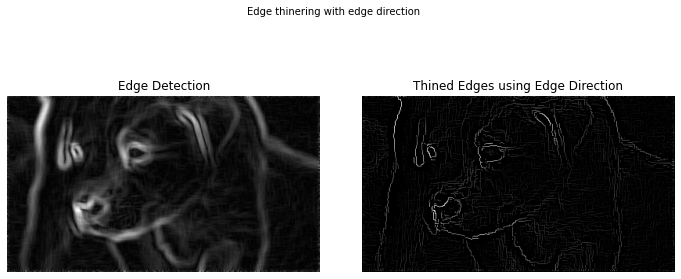

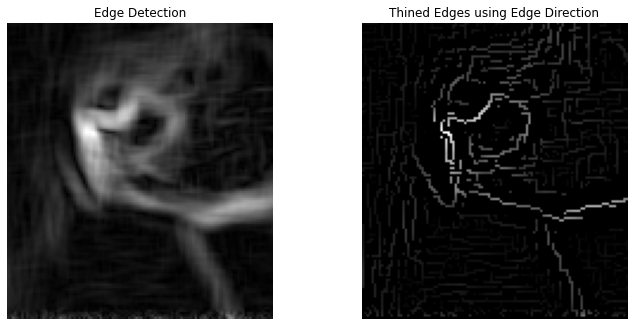

In [22]:
thin_img = edgeDet.non_max_suppression(bordered_img, theta=edge_dir)

title = "Edge thinering with edge direction"
imgs = [bordered_img, thin_img]
titles = ["Edge Detection", "Thined Edges using Edge Direction"]

print_n_imgs(imgs=imgs, titles=titles, title=title, width=5)
print_zoomed_imgs(imgs=imgs, titles=titles, title="", width=5)

#### AUMENTO DE CONTRASTE EN LOS BORDES SEGÚN UN UMBRAL DADO

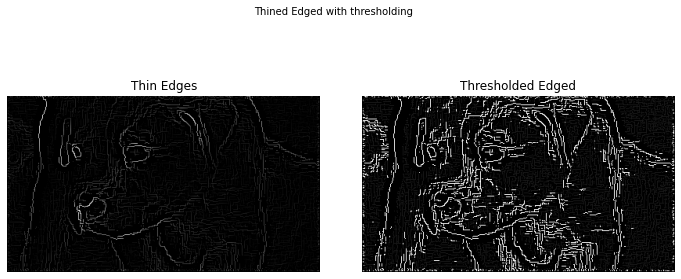

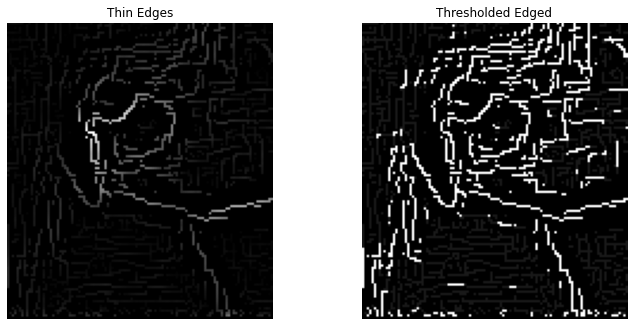

In [23]:
th_img, weak, strong = edgeDet.threshold(thin_img)

title = "Thined Edged with thresholding"
imgs = [thin_img, th_img]
titles = ["Thin Edges", "Thresholded Edged"]

print_n_imgs(imgs=imgs, titles=titles, title=title, width=5)
print_zoomed_imgs(imgs=imgs, titles=titles, title="", width=5)

#### ELIMINACIÓN DE BORDES DÉBILES

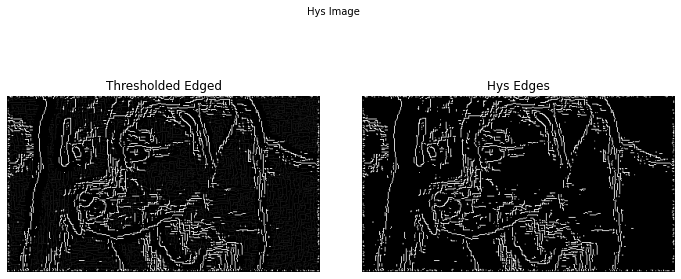

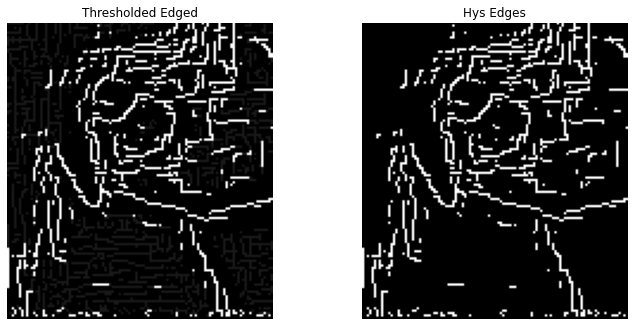

In [24]:
hys_img = edgeDet.hysteresis(th_img, weak, strong)

title = "Hys Image"
imgs = [th_img, hys_img]
titles = ["Thresholded Edged", "Hys Edges"]

print_n_imgs(imgs=imgs, titles=titles, title=title, width=5)
print_zoomed_imgs(imgs=imgs, titles=titles, title="", width=5)

#### RESULTADO FINAL

In [ ]:
title = "Edge detection"
imgs = [denoised_img, hys_img]
titles = ["Denoised Source", "Final Result"]

print_n_imgs(imgs=imgs, titles=titles, title=title, width=5)
print_zoomed_imgs(imgs=imgs, titles=titles, title="", width=5)